<a href="https://colab.research.google.com/github/WestonMadeira1/Homework_1/blob/main/Homework1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [166]:
file_path = '/content/drive/My Drive/ML Data/D3.csv'

df = pd.read_csv(file_path)
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [167]:
X1 = df.values[:,0]
X2 = df.values[:,1]
X3 = df.values[:,2]
Y = df.values[:,3]

m = len(X1)
n = len(X2)
o = len(X3)
p = len(Y)

print('X1 = ',X1[:5])
print('X2 = ',X2[:5])
print('X3 = ',X3[:5])
print('Y = ',Y[:5])
print('m = ',m)
print('n = ',n)
print('o = ',o)
print('p = ',p)


X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100
o =  100
p =  100


In [168]:
from IPython.display import display
display(df)


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


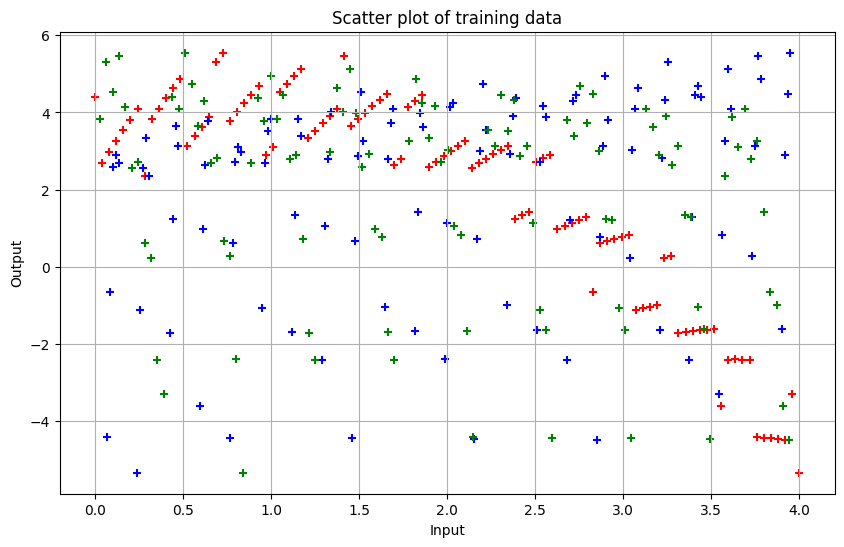

In [169]:
plt.scatter(X1,Y,color='red',marker='+')
plt.scatter(X2,Y,color='blue',marker='+')
plt.scatter(X3,Y,color='green',marker='+')

plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Scatter plot of training data')

# Show the plot
plt.show()

In [170]:
X_1 = X1.reshape(m, 1)
print(X_1[:10])
X_2 = X2.reshape(m, 1)
print(X_2[:10])
X_3 = X3.reshape(m, 1)
print(X_3[:10])

X_0 = np.ones((m, 1))
X_0[:5]



[[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]
 [0.2020202 ]
 [0.24242424]
 [0.28282828]
 [0.32323232]
 [0.36363636]]
[[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]
 [2.91474747]
 [3.60969697]
 [0.30464646]
 [0.99959596]
 [1.69454546]]
[[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]
 [2.68242424]
 [3.13090909]
 [3.57939394]
 [0.02787879]
 [0.47636364]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [173]:
X = np.hstack((X_0, X_1, X_2, X_3))
#X2 = np.hstack((X_0, X_2))
#X3 = np.hstack((X_0, X_3))
print(X[:10])
#print(X2[:10])
#print(X3[:10])

[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]
 [1.         0.2020202  2.91474747 2.68242424]
 [1.         0.24242424 3.60969697 3.13090909]
 [1.         0.28282828 0.30464646 3.57939394]
 [1.         0.32323232 0.99959596 0.02787879]
 [1.         0.36363636 1.69454546 0.47636364]]


In [174]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [175]:
def compute_cost(X,Y,theta):
   predictions = X.dot(theta)
   errors = np.subtract(predictions, Y)
   sqrErrors = np.square(errors)
   J = 1 / (2 * m) * np.sum(sqrErrors)
   return J

In [176]:
cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [177]:
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

In [237]:
theta = [0., 0., 0., 0.]
iterations = 1100
alpha = 0.01

In [238]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 3.58105812 -1.75888703  0.8189486  -0.01156497]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.89910324 0.89878314 0.89846368]


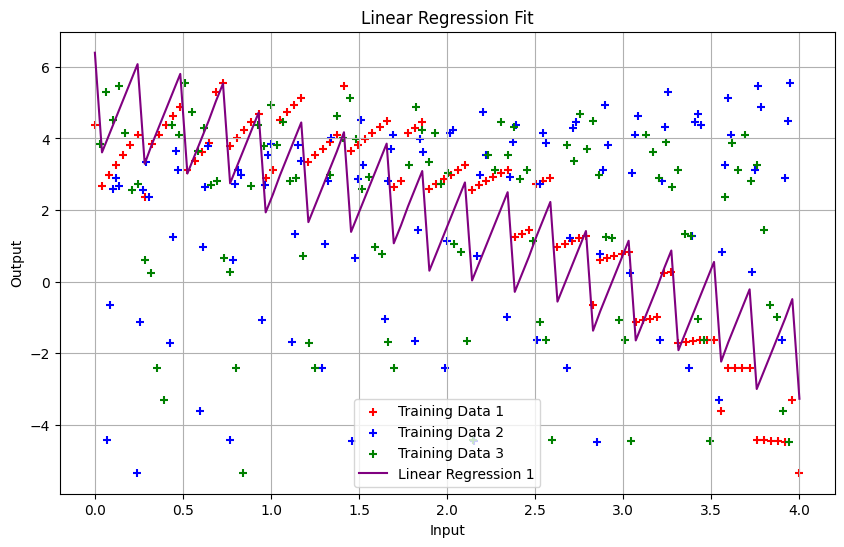

In [239]:
plt.scatter(X1[:, 1], Y, color='red', marker='+', label='Training Data 1')
plt.scatter(X2[:, 1], Y, color='blue', marker='+', label='Training Data 2')
plt.scatter(X3[:, 1], Y, color='green', marker='+', label='Training Data 3')

plt.plot(X[:, 1], X.dot(theta), color='purple', label='Linear Regression 1')
#plt.plot(X2[:, 1], X2.dot(theta2), color='blue', label='Linear Regression 2')
#plt.plot(X3[:, 1], X3.dot(theta3), color='green', label='Linear Regression 3')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression Fit')
plt.legend()

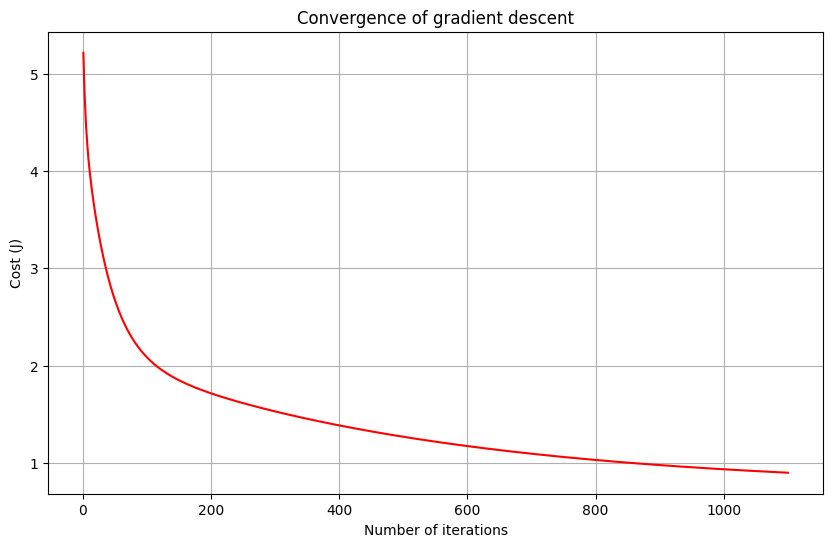

In [240]:
plt.plot(range(1, iterations + 1), cost_history, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [241]:
P1 = np.array([1,1,1])
P2 = np.array([2,0,4])
P3 = np.array([3,2,1])
predicted_value1 = theta[0]+theta[1]*P1[0]+theta[2]*P1[1]+theta[3]*P1[2]
predicted_value2 = theta[0]+theta[1]*P2[0]+theta[2]*P2[1]+theta[3]*P2[2]
predicted_value3 = theta[0]+theta[1]*P3[0]+theta[2]*P3[1]+theta[3]*P3[2]
print('Predicted value 1 =', predicted_value1)
print('Predicted value 2 =', predicted_value2)
print('Predicted value 3 =', predicted_value3)

Predicted value 1 = 2.6295547142935654
Predicted value 2 = 0.017024157491219792
Predicted value 3 = -0.06927074614708162
